# Welcome to the Tutorial of python plot

Base on my experience, I summarized some easy way to plot your own data.

This is a minimal Jupyter Notebook for teaching. You can run vitrul machine by colab link.

Try running the code cells below!

In [1]:
# Replace your name in "Student".
name = "Student"
print(f"Hello, {name}! Welcome to the class.")

Hello, Student! Welcome to the class.


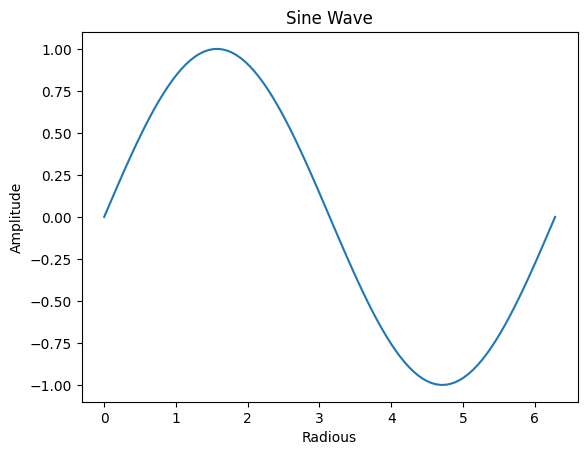

In [5]:
# try single plot first !
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

plt.plot(x, y)
plt.title("Sine Wave")
plt.xlabel('Radious')
plt.ylabel('Amplitude')
plt.show()

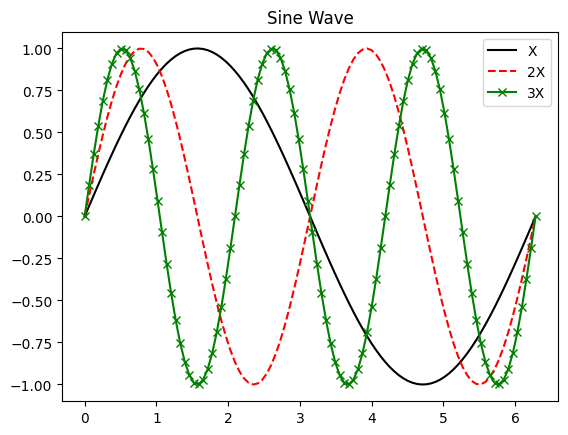

In [ ]:
# try multiple plot and adjust color of lines.
x = np.linspace(0, 2*np.pi, 100)

y1 = np.sin(x)
y2 = np.sin(2*x)
y3 = np.sin(3*x)

plt.plot(x, y1, 'k-',  label=f'X')
plt.plot(x, y2, 'r--', label=f'2X')
plt.plot(x, y3, 'gx-', label=f'3X')

plt.title("Sine Wave")
plt.xlabel('Radious')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

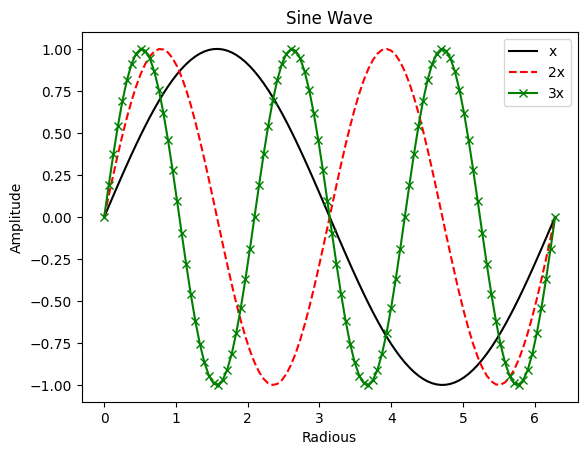

In [12]:
# use "for loop" do multiple plot.
x = np.linspace(0, 2*np.pi, 100)
y = [np.sin(n*x)
     for n in [1, 2, 3]]

colors = ['k', 'r', 'g']
lines  = ['-', '--', '-']
symbol = ['', '', 'x']
labels = ['x', '2x', '3x']

for n in range(3):
    plt.plot(x, y[n], color=colors[n], marker=symbol[n], linestyle=lines[n], label=labels[n])

plt.title("Sine Wave")
plt.xlabel('Radious')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [ ]:
# Read data from ascii type data.
fn = ['../demo_data/Demo1.txt',
      '../demo_data/Demo2.txt',
      '../demo_data/Demo2.txt',
      '../demo_data/reference.xye']

xye = []
for n in fn:
	xye.append(np.readtxt('n', skiprows=2).T)